In [1]:
import numpy as np
from utils import bellman_update, print_result

# 0. Warming up!

## 0.0. Toy Example

In [10]:
R = np.array([[-2.0, -0.5],
              [-1.0, -3.0]])

P = np.array([[0.75, 0.25],
              [0.75, 0.25],
              [0.25, 0.75],
              [0.25, 0.75]])

gamma = 0.9

## 0.1. Define Q-function and Greedy policy
What we need to compute: $Q(s, a) = r(s, a) + \gamma \sum_{s^\prime} p(s^\prime \mid s, a) v(s^\prime)$, and $\pi_{\text{greedy}}(s) = \arg\max_a Q(s, a)$.

In [15]:
def q_ftn(P, R, gamma, v):
    """
    given v, get corresponding q
    hint : v's shape = (|S|, 1)
           P's shape = (|S| * |A|, |S|)
           R's shape = (|S|, |A|)
           [Fill here]'s shape = (|S| * |A|, 1)
           numpy.matmul(A, x) returns a matrix multiplication result A * x.
    """
    # TODO : Complete the following line.
    # return R + gamma * np.reshape([Fill here], newshape=R.shape, order='F')


def bellman_update(P, R, gamma, v):
    # TODO : complete the function
    q = q_ftn(P, R, gamma, v)
    # v_next = ...
    return v_next


def greedy(P, R, gamma, v):
    """
    construct greedy policy by pi(s) = argmax_a q(s, a)
    """
    q = q_ftn(P, R, gamma, v)
    pi = np.argmax(q, axis=1)

    return pi


# 1. Value Iteration

In [38]:
EPS = 1e-6
nS, nA = R.shape
# initialize v
v = np.zeros(shape=(nS, 1), dtype=np.float)

count = 0
while True:
    v_next = bellman_update(P, R, gamma, v)
    if np.linalg.norm(v_next - v, ord=np.inf) < EPS:
        break
    v = v_next
    count += 1
print('Iteration terminated in {} steps.'.format(count))

pi = greedy(P, R, gamma, v)
print_result(v, pi)

Iteration terminated in 129-th step.
+========== Result ==========+
optimal value function : 
v(s1) = -7.327576823826019
v(s2) = -7.672404410032915
optimal policy : 
pi(s1) = a2
pi(s2) = a1


# 2. Policy Iteration

## 2.0. Bellman Equation for Policy Iteration

$P^\pi = \begin{pmatrix} p(s_1 \vert s_1, \pi(s_1)) & \cdots & p(s_N \vert s_1, \pi(s_1)) \\ \vdot & \ddot & \vdot \\ p(s_1 \vert s_N, \pi(s_N)) & \cdot & p(s_N \vert s_N, \pi(s_N))
\end{pmatrix}$


\begin{equation*}
v^\pi = (I - \gamma P^\pi)^{-1} R^{\pi}
\end{equation*}
To solve the above equation, you may use <font color='red'>numpy.linalg.solve(A, b)</font>.
This returns a solution of the linear equations $A x = b$, i.e., $x = A^{-1}b$.

In [34]:
def induced_dynamic(nS, P, R, pi):
    """
    given policy pi, compute induced dynamic P^pi & R^pi
    """
    S = range(nS)
    # TODO : complete the below line
    # rows = ...
    P_pi = P[rows]
    R_pi = np.array([[R[s, pi[s]]] for s in range(nS)])

    return P_pi, R_pi


def eval_policy(nS, P, R, gamma, pi):
    """
    policy evaluation
    """
    P_pi, R_pi = induced_dynamic(nS, P, R, pi)

    Id = np.identity(nS)
    # discounted reward problem
    # TODO : Complete the below lines. (Hint. numpy.linalg.solve(A, b) returns a solution of A * x = b., i.e. A^{-1}b)
    # A = ...
    # b = ...
    
    v_pi = np.linalg.solve(A, b)
    return v_pi

In [37]:
nS, nA = R.shape

# initialize policy
pi = np.random.randint(nA, size=nS)

count = 0
while True:
    v = eval_policy(nS, P, R, gamma, pi)
    pi_next = greedy(P, R, gamma, v)
    if (pi_next == pi).all():
        break
    pi = pi_next
    count += 1
print('Iteration terminated in {} steps.'.format(count))

print_result(v, pi)

Iteration terminated in 1-th step.
+========== Result ==========+
optimal value function : 
v(s1) = -7.3275862068965525
v(s2) = -7.672413793103449
optimal policy : 
pi(s1) = a2
pi(s2) = a1


# 3. Example : GridWorld

<img src="./gridworld.png" style="width: 500px;">

explanation

## 3.0. Load Model

In [2]:
from gridworld import GridWorld, plot_heatmap

P = GridWorld.P
R = GridWorld.R

gamma = 0.9

## 3.1. Value Iteration

In [10]:
from utils import *
import time

In [13]:
EPS = 1e-6
nS, nA = R.shape
# initialize v
v = np.zeros(shape=(nS, 1), dtype=np.float)

begin = time.time()
count = 0
while True:
    v_next = bellman_update(P, R, gamma, v)
    if np.linalg.norm(v_next - v, ord=np.inf) < EPS:
        break
    v = v_next
    count += 1
pi = greedy(P, R, gamma, v)
v_vi = v
print('Value iteration terminated in {} steps.'.format(count))
print('Elapsed time = ', time.time() - begin, 'sec')

Value iteration terminated in 153 steps.
Elapsed time =  0.011432886123657227 sec


## 3.2. Policy Iteration

In [14]:
nS, nA = R.shape

# initialize policy
pi = np.random.randint(nA, size=nS)

begin = time.time()
count = 0
while True:
    v = eval_policy(nS, P, R, gamma, pi)
    pi_next = greedy(P, R, gamma, v)
    if (pi_next == pi).all():
        break
    pi = pi_next
    count += 1
print('Policy iteration terminated in {} steps.'.format(count))
v_pi = v
print('Elapsed time = ', time.time() - begin, 'sec')

Policy iteration terminated in 8 steps.
Elapsed time =  0.003052949905395508 sec


## 3.3. Visualization!

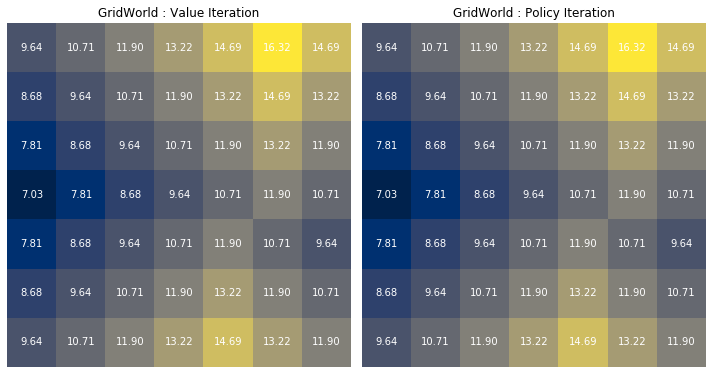

In [6]:
plot_heatmap(v_vi, v_pi)